# Circular Statistics

Circular mean, resultant length, and Rayleigh test for phase data.
These functions characterize the distribution of phase values on
the unit circle -- essential for assessing phase-locking significance.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import gastropy as gp

plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

## Three Phase Distributions

We compare concentrated (unimodal), uniform, and bimodal phase
distributions to illustrate how the circular statistics behave.

In [2]:
rng = np.random.default_rng(42)

# Concentrated around pi/4
concentrated = np.pi / 4 + 0.2 * rng.standard_normal(100)
z_c, p_c = gp.rayleigh_test(concentrated)
print("Concentrated (around pi/4):")
print(f"  Circular mean:     {gp.circular_mean(concentrated):.4f} rad (expected: {np.pi / 4:.4f})")
print(f"  Resultant length:  {gp.resultant_length(concentrated):.4f}")
print(f"  Rayleigh test:     z = {z_c:.2f}, p = {p_c:.2e}")

# Uniform
uniform = rng.uniform(-np.pi, np.pi, 200)
z_u, p_u = gp.rayleigh_test(uniform)
print("\nUniform:")
print(f"  Circular mean:     {gp.circular_mean(uniform):.4f} rad")
print(f"  Resultant length:  {gp.resultant_length(uniform):.4f}")
print(f"  Rayleigh test:     z = {z_u:.4f}, p = {p_u:.4f}")

# Bimodal (peaks at 0 and pi -- cancels out)
bimodal = np.concatenate([rng.normal(0, 0.3, 50), rng.normal(np.pi, 0.3, 50)])
z_b, p_b = gp.rayleigh_test(bimodal)
print("\nBimodal (0 and pi):")
print(f"  Resultant length:  {gp.resultant_length(bimodal):.4f}")
print(f"  Rayleigh test:     z = {z_b:.4f}, p = {p_b:.4f}")

Concentrated (around pi/4):
  Circular mean:     0.7754 rad (expected: 0.7854)
  Resultant length:  0.9881
  Rayleigh test:     z = 97.64, p = 9.37e-41

Uniform:
  Circular mean:     -2.8478 rad
  Resultant length:  0.0756
  Rayleigh test:     z = 1.1426, p = 0.3194

Bimodal (0 and pi):
  Resultant length:  0.0115
  Rayleigh test:     z = 0.0132, p = 0.9870


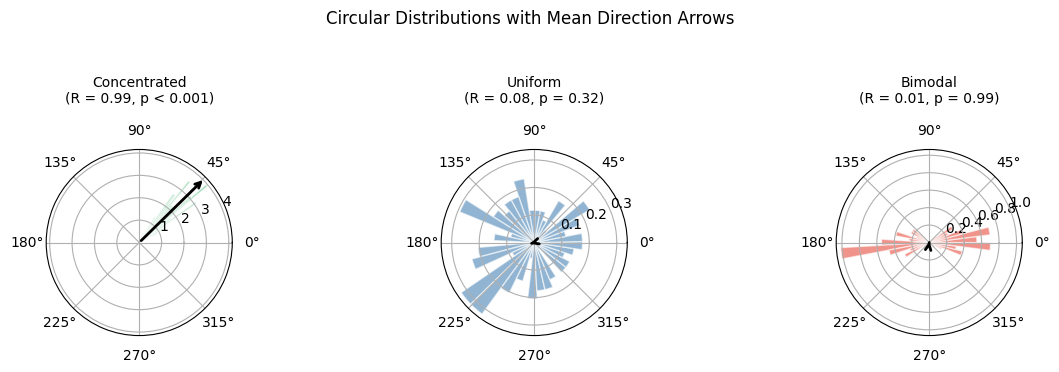

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3.5), subplot_kw={"projection": "polar"})

datasets = [
    (concentrated, "Concentrated\n(R = 0.99, p < 0.001)"),
    (uniform, "Uniform\n(R = 0.08, p = 0.32)"),
    (bimodal, "Bimodal\n(R = 0.01, p = 0.99)"),
]
colors = ["#27AE60", "steelblue", "#E74C3C"]

for ax, (phases, title), color in zip(axes, datasets, colors, strict=True):
    ax.hist(phases, bins=36, density=True, alpha=0.6, color=color, edgecolor="white")
    mean_dir = gp.circular_mean(phases)
    R = gp.resultant_length(phases)
    ax.annotate(
        "", xy=(mean_dir, R * ax.get_ylim()[1]), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color="black", lw=2)
    )
    ax.set_title(title, fontsize=10, pad=15)

fig.suptitle("Circular Distributions with Mean Direction Arrows", fontsize=12, y=1.05)
fig.tight_layout()
plt.show()

## Application: Phase Difference Distribution

In coupling analysis, the circular statistics are applied to the
phase *difference* between EGG and BOLD. A concentrated distribution
indicates consistent phase-locking.

In [4]:
# Simulate coupled EGG and BOLD phases
n = 378
egg = rng.uniform(-np.pi, np.pi, n)  # arbitrary EGG phases
bold = egg + 0.5 + 0.3 * rng.standard_normal(n)  # coupled with offset + noise

phase_diff = np.angle(np.exp(1j * (bold - egg)))
z_d, p_d = gp.rayleigh_test(phase_diff)

print("Phase difference (coupled):")
print(
    f"  Circular mean:     {gp.circular_mean(phase_diff):.4f} rad (= {np.rad2deg(gp.circular_mean(phase_diff)):.1f} deg)"
)
print(f"  Resultant length:  {gp.resultant_length(phase_diff):.4f}  (= PLV)")
print(f"  Rayleigh test:     z = {z_d:.2f}, p = {p_d:.2e}")

Phase difference (coupled):
  Circular mean:     0.5099 rad (= 29.2 deg)
  Resultant length:  0.9586  (= PLV)
  Rayleigh test:     z = 347.34, p = 4.31e-148


Note that the resultant length of the phase difference equals the
PLV -- they are mathematically identical. The Rayleigh test then
provides a parametric test for the significance of coupling.

**See also:** [PLV Computation](plv_computation.ipynb),
[Surrogate Testing](surrogate_testing.ipynb),
[Coupling Tutorial](../tutorials/gastric_brain_coupling.ipynb)